Model trained on largeSimpleBoolean5.
Score on largeSimpleBoolean5:
```
python -m encoders.evaluation.knnstats rnnsupervisedencoder-largeSimpleBoolean5.pkl expressions-synthetic/split/largeSimpleBoolean5-testset.json.gz expressions-synthetic/largeSimpleBoolean5.json.gz 
Avg Semantically Equivalent NNs: [1.         0.99954338 0.99908676 0.90251142 0.89949772 0.89604262
   0.89391172 0.8906583  0.88751903 0.88436834 0.88145842 0.85585997
   0.85308805 0.8500598  0.84682648]
```
Evaluation on a generated dataset, #vars=10, operators &|~, expression size=5.
Score not calculated.

In [1]:
import numpy
import pandas
from matplotlib import pyplot

from data.dataimport import import_data
import data.tree
from encoders.baseencoder import AbstractEncoder
from data.tree import Node

In [2]:
ENCODER_PKL = "../rnnsupervisedencoder-largeSimpleBoolean5.pkl"
VALIDATION_DATA = "../simple-bool-10-vars-size-5.json.gz"
DATA = VALIDATION_DATA

In [3]:
encoder = AbstractEncoder.load(ENCODER_PKL)

In [4]:
data = import_data(DATA)

In [5]:
def flatten_data(data):
    flat = []
    for key, class_ in data.items():
        for item in [class_['original']] + class_['noise']:
            flat.append({
                'eq_class': key,
                'expression': item
            })
    return flat
    
flat = flatten_data(data)

In [6]:
def set_encoding(encoder, flat):
    for item in flat:
        item['encoding'] = encoder.get_encoding(item['expression'])

set_encoding(encoder, flat)

Compiling Methods...
Compilation Finished...


In [7]:
def get_false():
    literal = "a"
    false = Node("Start", ("child",), "False")
    and_ = Node("And", ("left", "right"), "False", parent=false)
    false.set_children_for_property("child", [and_])
    literal_node = Node(literal, (), literal, parent=and_)
    and_.set_children_for_property("right", [literal_node])
    not_literal_node = Node("Not", ("child",), "Not({})".format(literal), parent=and_)
    literal_node_2 = Node(literal, (), literal, parent=not_literal_node)
    not_literal_node.set_children_for_property("child", [literal_node_2])
    and_.set_children_for_property("left", [not_literal_node])
    return list('(~{})&{}'.format(literal, literal)), false


print(get_false()[0])
print(str(get_false()[1]))

['(', '~', 'a', ')', '&', 'a']
-Start (False)
| \+child
|   \-And (False)
|     |+left
|     | \-Not (Not(a))
|     |   \+child
|     |     \-a (a)
|     \+right
|       \-a (a)



In [8]:
false_encoding = encoder.get_encoding(get_false())
false_encoding

array([-0.05260513, -0.00044746,  0.04525001, -0.06157264, -0.00188046,
        0.36537558,  0.09976053,  0.05204848, -0.23780778,  0.08532621,
       -0.0228723 , -0.02241857, -0.04955533, -0.01390181,  0.00938051,
        0.03112916, -0.19621707, -0.29946646,  0.02736039,  0.06212078,
        0.2329437 ,  0.06782116, -0.09762092,  0.0086074 , -0.05211248,
        0.02665711,  0.06885847,  0.01408929, -0.0252952 ,  0.05633501,
       -0.11335017, -0.02359352,  0.01245142, -0.03537644, -0.04661969,
        0.04746287, -0.19517879,  0.00144276, -0.17191605, -0.08180853,
        0.12777746, -0.0216901 ,  0.06097023, -0.07738505,  0.05765972,
       -0.09061714,  0.04844485, -0.08126201,  0.0794521 , -0.17091013,
       -0.00827959, -0.01486147, -0.00117874,  0.0524045 , -0.07889993,
        0.2792431 , -0.04980036, -0.15386842, -0.40302074, -0.09696799,
       -0.00703054, -0.31308216,  0.03352482,  0.05213499], dtype=float32)

In [9]:
def set_dist_to_false(false_encoding, flat):
    def dist(x,y):   
        return numpy.sqrt(numpy.sum((x-y)**2))
    
    for item in flat:
        item['dist'] = dist(item['encoding'], false_encoding)
set_dist_to_false(false_encoding, flat)

In [10]:
def make_table(flat):
    return [{'eq_class': item['eq_class'],
             'expression': item['expression'][0],
             'dist': item['dist']} for item in flat]
table = make_table(flat)

In [11]:
pandas.set_option('max_rows', 100)
df = pandas.DataFrame(table)
df

,dist,eq_class,expression
0,1.344056,(c & e) | (e & i),"[e, &, (, c, |, i, )]"
1,1.345657,(c & e) | (e & i),"[e, &, (, i, |, c, )]"
2,1.355024,(c & e) | (e & i),"[(, c, |, i, ), &, e]"
3,1.349271,(c & e) | (e & i),"[(, i, |, c, ), &, e]"
4,1.214095,i | ~e,"[i, |, (, ~, e, )]"
5,1.229744,i | ~e,"[(, ~, e, ), |, i]"
6,1.207732,i | ~e,"[~, (, e, &, (, ~, i, ), )]"
7,1.189882,i | ~e,"[~, (, (, ~, i, ), &, e, )]"
8,1.319010,(c & h) | (e & h),"[h, &, (, c, |, e, )]"
9,1.327159,(c & h) | (e & h),"[h, &, (, e, |, c, )]"


In [12]:
pandas.set_option('max_rows', 500)
df = pandas.DataFrame(table)
df[df.eq_class == 'False']

,dist,eq_class,expression
666,0.073551,False,"[a, &, (, ~, a, )]"
667,1.140077,False,"[b, &, (, ~, b, )]"
668,1.073319,False,"[c, &, (, ~, c, )]"
669,1.300063,False,"[d, &, (, ~, d, )]"
670,0.969687,False,"[e, &, (, ~, e, )]"
671,0.911480,False,"[f, &, (, ~, f, )]"
672,1.049595,False,"[g, &, (, ~, g, )]"
673,1.095684,False,"[h, &, (, ~, h, )]"
674,1.233428,False,"[i, &, (, ~, i, )]"
675,1.244413,False,"[j, &, (, ~, j, )]"


In [13]:
@numpy.vectorize
def bucketise(num):
    BUCKET_NUM = 20
    return numpy.floor(num / 2 * BUCKET_NUM)

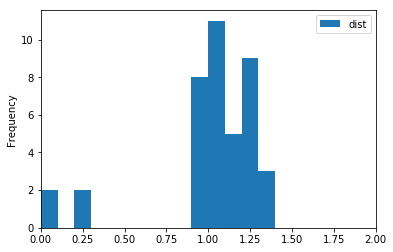

In [14]:
df[df.eq_class == 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

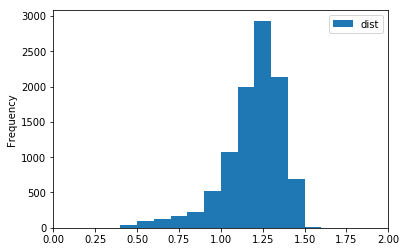

In [15]:
df[df.eq_class != 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

Conclusions: very small difference between unsatisfiable and satisfiable expressions.

Note: some of the expressions used here must have occured in training as well, including unsatisfiable expressions. There is so few unsatisfiable expressions of size 5, that all of them are listed above.